In [1]:
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn import tree

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/Users/nicolekacirek/Desktop/USF/Fall_Module_2/Machine_Learning/msds621_election_decisons/data/final.csv')

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.loc[:, df.columns != 'WINNER']
y = df.WINNER

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [10]:
X_train

,STATE,RACE,S1_DEM_RATIO,S2_DEM_RATIO,S3_DEM_RATIO,S1_REP_RATIO,S2_REP_RATIO,S3_REP_RATIO,S1_COR(DD),S2_COR(DD),S3_COR(DD),S1_COR(RR),S2_COR(RR),S3_COR(RR)
47,5,0,1.096943,1.049621,1.004858,0.956567,0.935390,1.065365,0.987904,0.960766,0.923829,0.990464,0.979886,0.960073
42,5,0,1.039012,1.052211,1.033076,0.985755,0.965454,0.961066,0.984496,0.984512,0.920476,0.989893,0.980293,0.917144
34,3,0,1.131864,1.033474,0.945166,0.961944,0.975966,1.122367,0.689304,0.978620,0.647626,0.821145,0.974520,0.809548
32,3,0,1.135287,1.048844,0.997180,0.935605,0.932314,1.112478,0.929842,0.763665,0.569107,0.945767,0.815615,0.837800
27,2,2,1.867850,1.426792,1.159094,0.773979,0.751867,0.773806,0.983931,0.991725,0.985663,0.989448,0.989163,0.981706
12,0,0,1.062649,0.882373,0.853267,1.002357,1.043770,1.114652,0.832841,0.902357,0.942092,0.815640,0.835749,0.946342
21,2,0,1.188571,1.069152,1.036832,0.945255,0.963015,0.965900,0.992831,0.996906,0.984263,0.984919,0.990979,0.984558
40,5,0,1.435055,1.336618,1.154033,0.928043,0.911290,0.928320,0.976078,0.981699,0.990904,0.978157,0.988676,0.987428
25,2,0,0.978133,0.976077,0.979274,1.046046,1.101123,1.208887,0.988227,0.982930,0.986597,0.948675,0.906336,0.945491
26,2,0,1.207396,1.086277,1.032783,0.912717,0.929222,0.961810,0.996944,0.987245,0.989390,0.995841,0.977930,0.970382


In [11]:
clf = tree.DecisionTreeClassifier()

In [12]:
clf = clf.fit(X_train, y_train)

In [13]:
n_nodes = clf.tree_.node_count
n_nodes

17

In [14]:
try:
    import pydotplus
except ImportError:
    import pip
    import sys
    import subprocess
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'dit'])
    import pydotplus    

In [15]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz

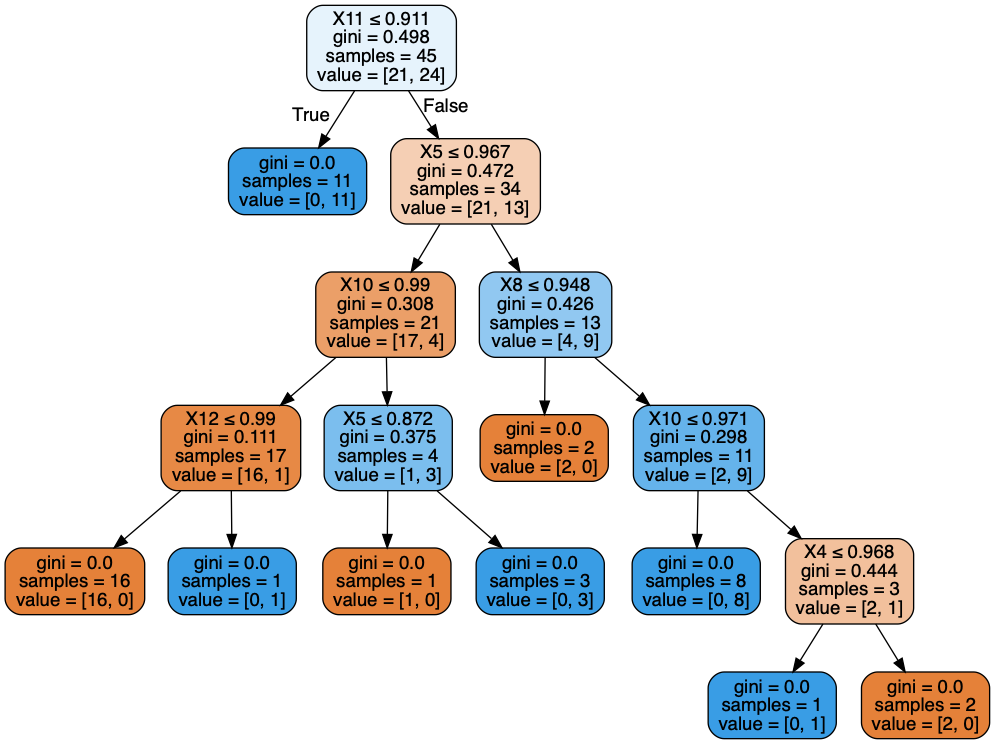

In [16]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
predicted = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(predicted, y_test):.3f}")

Accuracy: 0.833


In [19]:
kwargs_regularize = dict(min_samples_split=10)
dt = tree.DecisionTreeClassifier(**kwargs_regularize)
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)
print(f"Accuracy: {accuracy_score(predicted, y_test):.3f}")

Accuracy: 0.667


In [20]:
n_nodes = dt.tree_.node_count
n_nodes

13

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
clf = RandomForestClassifier()
clf.fit(X, y)

/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
predicted = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(predicted, y_test):.3f}")

Accuracy: 1.000
